In [23]:
path = r"C:\Users\Purushotham\Desktop\deloitte\neuralnetworks\cnn\cell_images"
train_path = path + "\\train"
print(train_path)

C:\Users\Purushotham\Desktop\deloitte\neuralnetworks\cnn\cell_images\train


In [3]:
import os
import os.path
test_path = os.path.join(path, 'test')
test_path


'C:\\Users\\Purushotham\\Desktop\\deloitte\\neuralnetworks\\cnn\\cell_images\\test'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [5]:
os.listdir(path)

['test', 'train']

In [6]:
len(os.listdir(test_path))

2

In [7]:
os.listdir(test_path)


['parasitized', 'uninfected']

In [12]:
os.listdir(os.path.join(test_path,'parasitized' ))[4]

'C100P61ThinF_IMG_20150918_145609_cell_150.png'

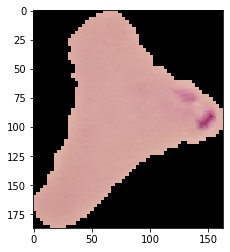

In [13]:
para_cell = os.path.join(test_path,'parasitized', 'C100P61ThinF_IMG_20150918_145609_cell_150.png')
para_img  = imread(para_cell)
plt.imshow(para_img)

In [11]:
para_img.shape

(112, 145, 3)

In [14]:
para_img.shape

(187, 163, 3)

In [17]:
os.listdir(os.path.join(test_path,'uninfected' ))[4]

'C100P61ThinF_IMG_20150918_145938_cell_145.png'

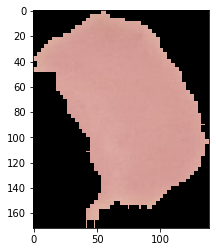

In [19]:

uninf_cell = os.path.join(test_path,'uninfected', 'C100P61ThinF_IMG_20150918_145938_cell_145.png')
uninf_img  = imread(uninf_cell)
plt.imshow(uninf_img)

In [20]:
uninf_img.shape

(172, 139, 3)

In [24]:
len(os.listdir(os.path.join(train_path, 'parasitized')))

12480

In [25]:
len(os.listdir(os.path.join(train_path, 'uninfected')))

12480

In [26]:
len(os.listdir(os.path.join(test_path, 'parasitized')))

1300

In [27]:
len(os.listdir(os.path.join(test_path, 'uninfected')))

1300

### What is the appropriate resizing value

In [29]:
dim1 = []
dim2 = []
for image_file in os.listdir(os.path.join(train_path, 'uninfected')):
    img = imread(os.path.join(train_path, 'uninfected', image_file))
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


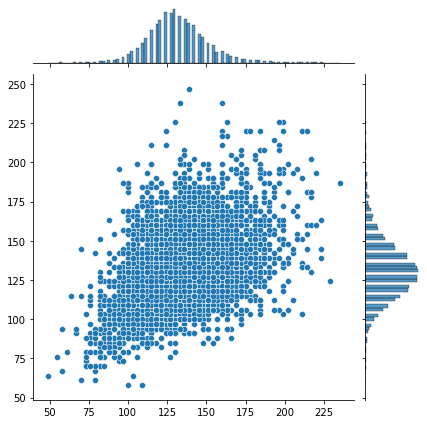

In [30]:
sns.jointplot(dim1, dim2)

In [31]:
np.mean(dim1)

131.64820899110507

In [32]:
np.mean(dim2)

131.4041990544114

In [43]:
image_shape = (130, 130, 3)

### Prepare the data for the model

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Args:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_s

In [35]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

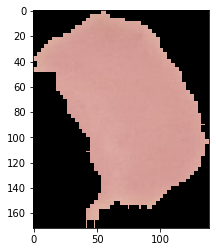

In [36]:
plt.imshow(uninf_img)

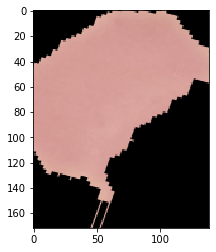

In [37]:
plt.imshow(image_gen.random_transform(uninf_img))

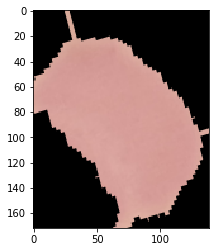

In [38]:
plt.imshow(image_gen.random_transform(uninf_img))

### Directory Sourcing of Images

In [39]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [40]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


### Create the model

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [44]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [46]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

### Training

In [47]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Args:
        directory: string, path to the target directory. It should contain one
          subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside
          each of the subdirectories directory tree will be included in the
          generator. See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
              for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
          256)`. The dimensions to which all image

In [48]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [49]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [50]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 604s 386ms/step - loss: 0.3477 - accuracy: 0.8381 - val_loss: 0.1921 - val_accuracy: 0.9350
Epoch 2/20
1560/1560 [==============================] - 505s 324ms/step - loss: 0.1874 - accuracy: 0.9401 - val_loss: 0.1712 - val_accuracy: 0.9454
Epoch 3/20
1560/1560 [==============================] - 523s 335ms/step - loss: 0.1675 - accuracy: 0.9486 - val_loss: 0.1651 - val_accuracy: 0.9462
Epoch 4/20
1560/1560 [==============================] - 533s 341ms/step - loss: 0.1563 - accuracy: 0.9497 - val_loss: 0.1556 - val_accuracy: 0.9492
Epoch 5/20
1560/1560 [==============================] - 527s 338ms/step - loss: 0.1511 - accuracy: 0.9500 - val_loss: 0.1624 - val_accuracy: 0.9473
Epoch 6/20
1259/1560 [=======================>......] - ETA: 1:37 - loss: 0.1477 - accuracy: 0.9525

### Evaluate the model

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
model.evaluate_generator(test_image_gen)

In [ ]:
pred_probabilities = model.predict_generator(test_image_gen)

In [ ]:
pred_probabilities

In [ ]:
test_image_gen.classes

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
predictions

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes, predictions))

In [ ]:
confusion_matrix(test_image_gen.classes, predictions)

### Prediction

In [ ]:
uninf_cell

In [ ]:
from tendsorflow.keras.preprocessing import image

In [ ]:
my_image = image.load_image(uninf_cell, target_size=image_shape)

In [ ]:
my_image

In [ ]:
my_image = image.img_to_array(my_image)

In [ ]:
my_image.shape #(130, 130, 3) => (1, 130, 130, 3)

In [ ]:
#model.predict(my_image.reshape(1, 130, 130, 3))

In [ ]:
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
model.predict(my_image)

In [ ]:
train_image_gen.class_indeces

In [ ]:
test_image_gen.class_indeces